In [1]:
import math
import matplotlib.pyplot as plt
import random

## 🎲 Método cuadrado–mitad

El **método cuadrado–mitad** es un generador clásico de números pseudoaleatorios.

### 📌 Idea básica

Sea $x_0$ una semilla con $n$ dígitos. El procedimiento iterativo es:

1. Elevar la semilla al cuadrado.
2. Escribir $x_k^2$ con al menos $2n$ dígitos (agregando ceros a la izquierda si es necesario).
3. Tomar los $n$ dígitos centrales del resultado.
4. Definir ese valor como la nueva semilla $x_{k+1}$.

De forma general,

$$
x_{k+1} = M_n\!\left(x_k^2\right),
$$

donde $M_n(\cdot)$ denota la operación de extraer los $n$ dígitn}, \qquad 0 \le u_k < 1.
$$

---

### ⚠️ Observación

Aunque es sencillo de implementar, este método puede caer.almente de interés histórico o educativo.


In [21]:
def cuadrado_mitad(seed, pasos):
    """
    Generador pseudoaleatorio usando el método cuadrado–mitad.

    Parámetros
    ----------
    seed : int
        Semilla inicial x0 .
    pasos : int
        Cantidad de números a generar.
    Retorna
    -------
    list
        Lista con los números generados.
    """

    x = seed
    resultados = []
    n = len(str(seed))
    i = 0
    while i < pasos:
        # 1) elevar al cuadrado
        cuadrado = x**2

        # 2) convertir a string con al menos 2n dígitos
        s = str(cuadrado).zfill(2 * n)

        # 3) extraer los n dígitos centrales
        inicio = (len(s) - n) //  2
        medio = s[inicio:inicio + n]

        # 4) nueva semilla
        x = int(medio)

        # 5) guardar resultado
        
        resultados.append(x)
        i = i+1 

    return resultados




[5227, 3215, 3362, 3030, 1809, 2724, 4201, 6484, 422, 1780]


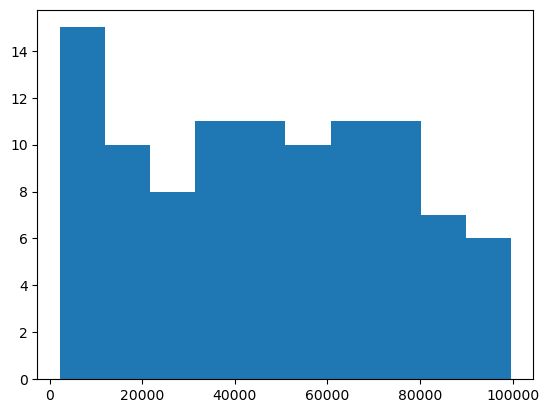

In [63]:
# ✅ Ejemplo de uso
nums = cuadrado_mitad(seed=24546, pasos=100)
plt.hist(nums)
plt.show()

## 🎲 Generador lineal congruencial (GLC)

El **generador lineal congruencial** es uno de los métodos más clásicos para producir números pseudoaleatorios.

### 📌 Definición

La sucesión se define mediante la recurrencia

$$
x_{n+1} = \mathrm{glc}(x_n) = a(x_n + c) \; \text{mod} \; m,
$$

y los números pseudoaleatorios normalizados se obtienen como

$$
u_n = \mathrm{gglc}(x_n) = \frac{x_n}{m}.
$$

donde:

- $a$ : multiplicador,
- $c$ : incremento,
- $m$ : módulo,
- $x_0$ : semilla inicial.

---

### ⚙️ Parámetros de Park y Miller (1988)

Park y Miller sugirieron la siguiente elección de parámetros:

$$
m = 2^{31} - 1, \qquad a = 7^5, \qquad c = 0.
$$

Este caso particular se conoce como el **minimal standard generator** y es ampliamente usado como referencia histórica en simulación.


In [30]:
class GLC:
    """
    Generador Lineal Congruencial (Park & Miller por default)

    x_{n+1} = a (x_n + c) mod m
    u_n = x_n / m
    """

    def __init__(self, m=2**31 - 1, a=7**5, c=0, seed=1):
        """
        Parámetros
        ----------
        m : int
            Módulo
        a : int
            Multiplicador
        c : int
            Incremento
        seed : int
            Semilla inicial
        """
        self.m = m
        self.a = a
        self.c = c
        self.state = seed

    # ---------------------------------------------------
    # Genera un solo número
    # ---------------------------------------------------
    def _next(self):
        self.state = (self.a * (self.state + self.c)) % self.m
        return self.state / self.m

    # ---------------------------------------------------
    # Genera una muestra de tamaño n
    # ---------------------------------------------------
    def sample(self, n):
        """
        Genera n números pseudoaleatorios en (0,1).
        """
        return [self._next() for _ in range(n)]

    # ---------------------------------------------------
    # Histograma de una muestra
    # ---------------------------------------------------
    def histogram(self, n, bins=30):
        """
        Genera n números y grafica su histograma.
        """
        data = self.sample(n)

        plt.figure()
        plt.hist(data, bins=bins, density=True)
        plt.title("Histograma - Generador Lineal Congruencial")
        plt.xlabel("u")
        plt.ylabel("Frecuencia")
        plt.show()

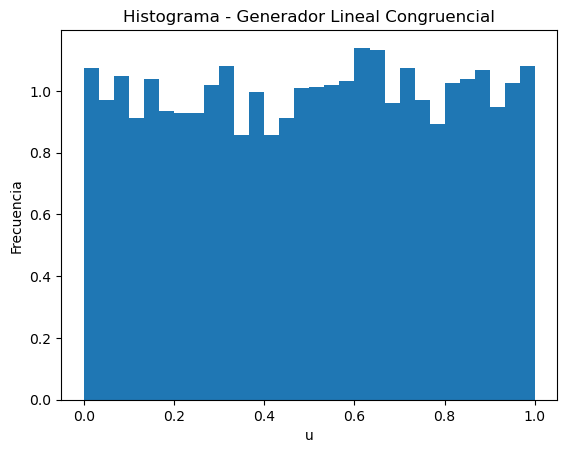

In [40]:
glc = GLC(seed=1092)

muestra = glc.sample(1000)

glc.histogram(5000)

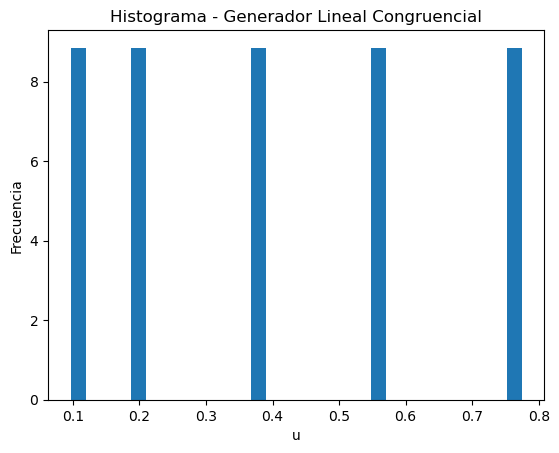

In [50]:
glc = GLC(seed=15672,a=2**9,c=0,m=2**5-1)

muestra = glc.sample(1000)

glc.histogram(5000)

In [75]:
#Generar números uniformes
random.seed(23)

for _ in range(10):
    print(random.random())

0.9248652516259452
0.9486057779931771
0.8924333440485793
0.08355067683068362
0.5920272268857353
0.4237474082349614
0.5300880101180064
0.13030294124748054
0.1919971575392927
0.444573573873013


## 🎲 Simulación usando $U \sim \mathrm{Uniforme}(0,1)$

### 🔹 Caso Bernoulli($p$)

Si tenemos acceso a una variable aleatoria $U \sim \mathrm{Uniforme}(0,1)$, 
podemos simular una variable

$$
X \sim \mathrm{Bernoulli}(p), \qquad 0 < p < 1,
$$

definiendo

$$
X = \mathbf{1}_{\{U \le p\}}.
$$

En efecto,

- $P(X=1) = P(U \le p) = p$,
- $P(X=0) = 1 - p$,

por lo que $X$ tiene distribución Bernoulli$(p)$.

---

### 🔹 Caso discreto general

Sea $X$ una variable aleatoria discreta que toma valores en

$$
\{x_1, x_2, \dots, x_n\},
$$

con probabilidades

$$
P[X = x_i] = p_i, \qquad i=1,\dots,n,
$$

donde

$$
\sum_{i=1}^{n} p_i = 1.
$$

Para simular $X$ usando $U \sim \mathrm{Uniforme}(0,1)$, definimos:

$$
X =
\begin{cases}
x_1, & \text{si } 0 < U \le p_1, \\
x_2, & \text{si } p_1 < U \le p_1 + p_2, \\
\vdots \\
x_n, & \text{si } p_1 + \cdots + p_{n-1} < U \le 1.
\end{cases}
$$

Este procedimiento se basa en dividir el intervalo $(0,1)$ según las
probabilidades acumuladas y asignar cada subintervalo a un valor posible de $X$.


In [82]:

class Bernoulli:
    """
    Generador de variables aleatorias Bernoulli(p)
    usando U ~ Uniforme(0,1) vía random.random().
    """

    def __init__(self, p):
        if not (0 <= p <= 1):
            raise ValueError("p debe estar en [0,1]")
        self.p = p

    # ---------------------------------------------------
    # Genera una sola realización
    # ---------------------------------------------------
    def _next(self):
        u = random.random()
        return 1 if u <= self.p else 0

    # ---------------------------------------------------
    # Genera una muestra
    # ---------------------------------------------------
    def sample(self, n):
        return [self._next() for _ in range(n)]

    # ---------------------------------------------------
    # Bar plot (correcto para variable discreta)
    # ---------------------------------------------------
    def barplot(self, n):
        data = self.sample(n)

        # frecuencias empíricas
        count_0 = data.count(0) / n
        count_1 = data.count(1) / n

        plt.figure()
        plt.bar([0, 1], [count_0, count_1])
        plt.title(f"Bar plot Bernoulli(p={self.p})")
        plt.xlabel("Valor")
        plt.ylabel("Frecuencia relativa")
        plt.xticks([0, 1])
        plt.show()


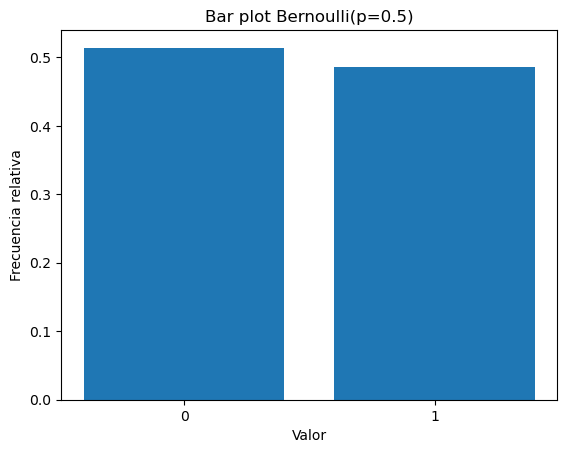

In [92]:
bern = Bernoulli(0.5)
bern.barplot(1000)

In [88]:

class DiscretaGeneral:
    """
    Generador para una variable aleatoria discreta general.

    Valores posibles: x1, x2, ..., xn
    Probabilidades:  p1, p2, ..., pn   con sum(pi)=1

    Usa U ~ Uniforme(0,1) vía random.random()
    y el método de probabilidades acumuladas.
    """

    def __init__(self, valores, probabilidades):
        if len(valores) != len(probabilidades):
            raise ValueError("valores y probabilidades deben tener la misma longitud")

        if abs(sum(probabilidades) - 1.0) > 1e-8:
            raise ValueError("Las probabilidades deben sumar 1")

        self.valores = valores
        self.probabilidades = probabilidades

        # Construir probabilidades acumuladas
        self.acumuladas = []
        s = 0.0
        for p in probabilidades:
            s += p
            self.acumuladas.append(s)

    # ---------------------------------------------------
    # Genera una sola realización
    # ---------------------------------------------------
    def _next(self):
        u = random.random()

        for valor, p_acum in zip(self.valores, self.acumuladas):
            if u <= p_acum:
                return valor


    # ---------------------------------------------------
    # Genera muestra
    # ---------------------------------------------------
    def sample(self, n):
        return [self._next() for _ in range(n)]

    # ---------------------------------------------------
    # Bar plot (correcto para distribución discreta)
    # ---------------------------------------------------
    def barplot(self, n):
        data = self.sample(n)

        # frecuencias empíricas
        freqs = []
        for v in self.valores:
            freqs.append(data.count(v) / n)

        plt.figure()
        plt.bar(self.valores, freqs)
        plt.title("Bar plot - Distribución discreta general")
        plt.xlabel("Valores")
        plt.ylabel("Frecuencia relativa")
        plt.show()


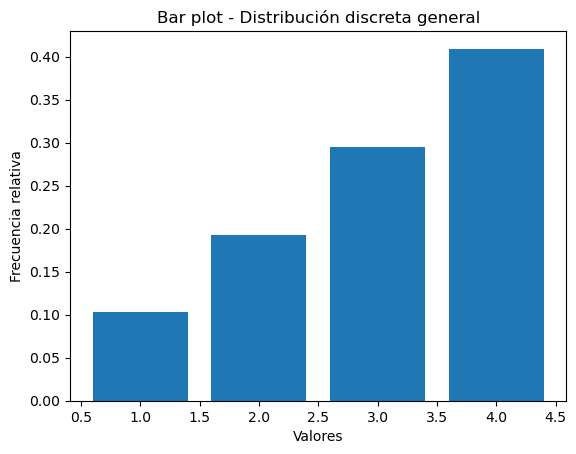

In [93]:
valores = [1, 2, 3, 4]
probs = [0.1, 0.2, 0.3, 0.4]

dg = DiscretaGeneral(valores, probs)

muestra = dg.sample(10)

dg.barplot(5000)


## 🎲 Simulación de una uniforme $(a,b)$ usando $U \sim \mathrm{Uniforme}(0,1)$

Sea $X \sim \mathrm{Uniforme}(0,1)$.  
Podemos construir una variable aleatoria

$$
Y = (b-a)X + a,
$$

donde $a < b$, y entonces

$$
Y \sim \mathrm{Uniforme}(a,b).
$$

### 📌 Idea

La transformación

$$
T(x) = (b-a)x + a
$$

es una transformación lineal que:

- escala el intervalo $(0,1)$ a longitud $(b-a)$,
- y lo traslada para que comience en $a$.

En efecto,

- si $X \in (0,1)$ entonces $Y \in (a,b)$,
- y la densidad resultante es constante en $(a,b)$.

### 🔹 Procedimiento de simulación

1. Generar $X \sim \mathrm{Uniforme}(0,1)$.
2. Definir
   $$
   Y = (b-a)X + a.
   $$
3. El valor obtenido tiene distribución $\mathrm{Uniforme}(a,b)$.


In [94]:
class UniformeAB:
    """
    Generador Uniforme(a,b) usando U ~ Uniforme(0,1)
    vía la transformación Y = (b-a)X + a.
    """

    def __init__(self, a, b):
        if b <= a:
            raise ValueError("Se requiere a < b")
        self.a = a
        self.b = b

    # ---------------------------------------------------
    # Genera una sola realización
    # ---------------------------------------------------
    def _next(self):
        x = random.random()  # Uniforme(0,1)
        return (self.b - self.a) * x + self.a

    # ---------------------------------------------------
    # Genera muestra
    # ---------------------------------------------------
    def sample(self, n):
        return [self._next() for _ in range(n)]

    # ---------------------------------------------------
    # Histograma
    # ---------------------------------------------------
    def histogram(self, n, bins=30):
        data = self.sample(n)

        plt.figure()
        plt.hist(data, bins=bins, density=True)
        plt.title(f"Histograma Uniforme({self.a},{self.b})")
        plt.xlabel("Valor")
        plt.ylabel("Densidad")
        plt.show()


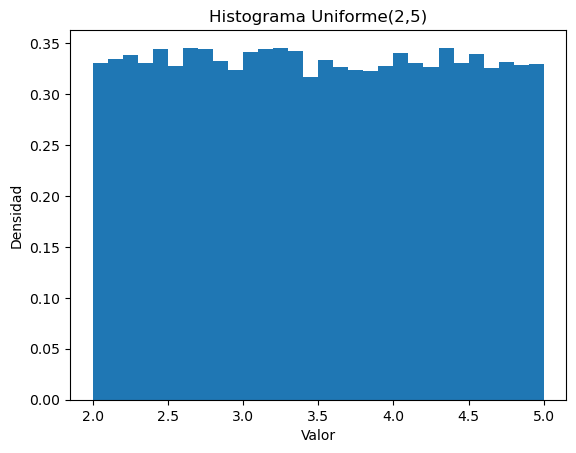

In [97]:
u = UniformeAB(2, 5)

muestra = u.sample(5)

u.histogram(50000)

## 🎲 Simulación de una variable aleatoria Cauchy usando variables Uniformes

La distribución **Cauchy estándar** tiene densidad

$$
f(x)=\frac{1}{\pi(1+x^2)}, \qquad x \in \mathbb{R}.
$$

Existen dos transformaciones clásicas para simular una variable
$$
X \sim \mathrm{Cauchy}(0,1)
$$
a partir de variables Uniformes.

---

## 🔹 1. Usando $\Theta \sim \mathrm{Uniforme}(0,2\pi)$

Sea

$$
\Theta \sim \mathrm{Uniforme}(0,2\pi).
$$

Definimos la transformación

$$
X = \tan\!\left(\frac{\Theta}{2}\right).
$$

Entonces

$$
X \sim \mathrm{Cauchy}(0,1).
$$

### 📌 Idea

La transformación

$$
x = \tan(\theta/2)
$$

convierte un ángulo uniforme sobre el círculo en una variable real con
colas pesadas. El jacobiano del cambio de variable produce el factor
$(1+x^2)^{-1}$ característico de la densidad Cauchy.

Geométricamente:

- se toma un ángulo uniforme,
- se proyecta mediante la tangente,
- se obtiene una distribución Cauchy en la recta real.

---

## 🔹 2. Usando $U \sim \mathrm{Uniforme}(0,1)$ (transformada inversa)

Otra forma equivalente parte de

$$
U \sim \mathrm{Uniforme}(0,1).
$$

Definimos

$$
X = \tan\!\big(\pi(U - \tfrac12)\big).
$$

Entonces

$$
X \sim \mathrm{Cauchy}(0,1).
$$

### 📌 Justificación

La función de distribución acumulada (CDF) de la Cauchy estándar es

$$
F(x)=\frac12+\frac{1}{\pi}\arctan(x).
$$

Aplicando el método de la transformada inversa:

$$
U = F(X)
\quad \Rightarrow \quad
X = \tan\!\big(\pi(U-\tfrac12)\big).
$$

---

## ⭐ Observación

Ambas construcciones son equivalentes:

- $\Theta = 2\pi U$ con $U\sim U(0,1)$,
- sustituyendo en $X=\tan(\Theta/2)$ se obtiene
  $$
  X=\tan(\pi U).
  $$
- desplazando $U$ en $1/2$ se obtiene la forma simétrica más usada:
  $$
  X=\tan\!\big(\pi(U-\tfrac12)\big).
  $$

Esta segunda expresión suele preferirse en simulación numérica porque es
más directa y evita trabajar explícitamente con ángulos en $(0,2\pi)$.


In [98]:
class Cauchy:
    """
    Generador Cauchy(0,1) usando U ~ Uniforme(0,1)

    Transformación:
        X = tan( pi (U - 1/2) )
    """

    def __init__(self):
        pass

    # ---------------------------------------------------
    # Genera una sola realización
    # ---------------------------------------------------
    def _next(self):
        u = random.random()          # U ~ Uniforme(0,1)
        return math.tan(math.pi * (u - 0.5))

    # ---------------------------------------------------
    # Genera una muestra
    # ---------------------------------------------------
    def sample(self, n):
        return [self._next() for _ in range(n)]

    # ---------------------------------------------------
    # Histograma
    # ---------------------------------------------------
    def histogram(self, n, bins=60, rango=(-10, 10)):
        """
        Nota:
        La Cauchy tiene colas muy pesadas, por eso
        se limita el rango del histograma.
        """
        data = self.sample(n)

        plt.figure()
        plt.hist(data, bins=bins, density=True, range=rango)
        plt.title("Histograma Cauchy(0,1)")
        plt.xlabel("x")
        plt.ylabel("Densidad")
        plt.show()


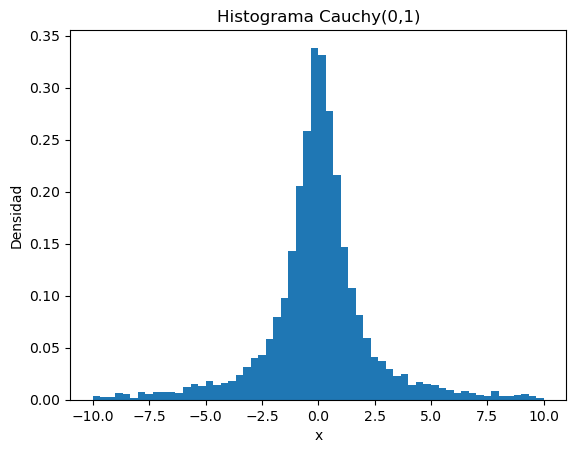

In [99]:
c = Cauchy()

muestra = c.sample(5)
c.histogram(10000)


## 🎲 Simulación de una variable Exponencial usando $U \sim \mathrm{Uniforme}(0,1)$

Sea $X$ una variable aleatoria con distribución exponencial de parámetro
$\lambda > 0$, cuya densidad es

$$
f(x)=\lambda e^{-\lambda x}, \qquad x \ge 0.
$$

---

## 🔹 Método de la transformada inversa

La función de distribución acumulada (CDF) de la exponencial es

$$
F(x)=1-e^{-\lambda x}.
$$

Si $U \sim \mathrm{Uniforme}(0,1)$, entonces por el método de la
transformada inversa:

$$
U = F(X) = 1 - e^{-\lambda X}.
$$

Despejando $X$:

$$
X = -\frac{1}{\lambda}\ln(1-U).
$$

Por lo tanto, si definimos

$$
X = -\frac{1}{\lambda}\ln(1-U),
$$

entonces

$$
X \sim \mathrm{Exponencial}(\lambda).
$$

---

## ⭐ Forma equivalente

Como $1-U \sim \mathrm{Uniforme}(0,1)$, también puede usarse

$$
X = -\frac{1}{\lambda}\ln(U),
$$

que es la forma más común en simulación computacional.


In [100]:
class Exponencial:
    """
    Generador Exponencial(lambda) usando U ~ Uniforme(0,1)

        X = - (1/lambda) * log(U)
    """

    def __init__(self, lam):
        if lam <= 0:
            raise ValueError("lambda debe ser positiva")
        self.lam = lam

    # ---------------------------------------------------
    # Genera una sola realización
    # ---------------------------------------------------
    def _next(self):
        u = random.random()     # U ~ Uniforme(0,1)
        return -math.log(u) / self.lam

    # ---------------------------------------------------
    # Genera muestra
    # ---------------------------------------------------
    def sample(self, n):
        return [self._next() for _ in range(n)]

    # ---------------------------------------------------
    # Histograma
    # ---------------------------------------------------
    def histogram(self, n, bins=50):
        data = self.sample(n)

        plt.figure()
        plt.hist(data, bins=bins, density=True)
        plt.title(f"Histograma Exponencial(lambda={self.lam})")
        plt.xlabel("x")
        plt.ylabel("Densidad")
        plt.show()


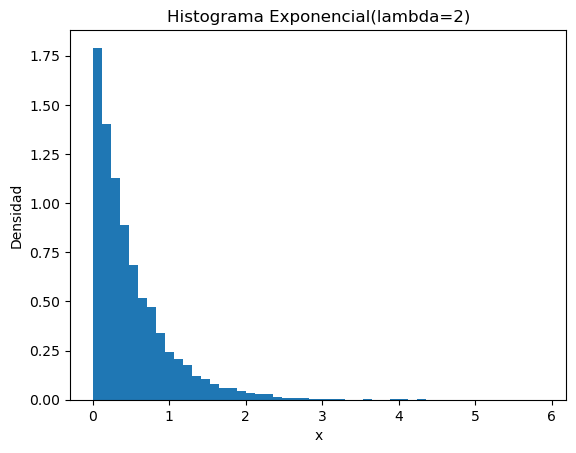

In [101]:
exp = Exponencial(lam=2)

muestra = exp.sample(5)

exp.histogram(10000)

## 🎲 Simulación Gamma usando el producto de uniformes

Sea $X \sim \mathrm{Gamma}(k,\lambda)$ con $k \in \mathbb{N}$ y $\lambda>0$.

Si $U_1,\dots,U_k \sim \mathrm{Uniforme}(0,1)$ independientes, entonces

$$
X = -\frac{1}{\lambda}\ln\!\Big(\prod_{i=1}^{k} U_i\Big)
$$

sigue una distribución $\mathrm{Gamma}(k,\lambda)$.

### 📌 Idea

Sabemos que una exponencial puede generarse como

$$
E_i = -\frac{1}{\lambda}\ln(U_i).
$$

Entonces

$$
X=\sum_{i=1}^k E_i
= -\frac{1}{\lambda}\sum_{i=1}^k \ln(U_i)
= -\frac{1}{\lambda}\ln\!\Big(\prod_{i=1}^k U_i\Big).
$$

Esta forma es algebraicamente equivalente pero suele ser más compacta
y eficiente en implementación.


In [103]:
class Gamma:
    """
    Generador Gamma(k, lambda) con k entero positivo
    usando el producto de uniformes.
    """

    def __init__(self, k, lam):
        if k <= 0 or int(k) != k:
            raise ValueError("k debe ser entero positivo")
        if lam <= 0:
            raise ValueError("lambda debe ser positiva")

        self.k = int(k)
        self.lam = lam

    # ---------------------------------------------------
    # Genera una sola realización
    # ---------------------------------------------------
    def _next(self):
        prod = 1.0
        for _ in range(self.k):
            prod *= random.random()  # producto de Uniformes(0,1)

        return -math.log(prod) / self.lam

    # ---------------------------------------------------
    # Genera muestra
    # ---------------------------------------------------
    def sample(self, n):
        return [self._next() for _ in range(n)]

    # ---------------------------------------------------
    # Histograma
    # ---------------------------------------------------
    def histogram(self, n, bins=50):
        data = self.sample(n)

        plt.figure()
        plt.hist(data, bins=bins, density=True)
        plt.title(f"Histograma Gamma(k={self.k}, lambda={self.lam})")
        plt.xlabel("x")
        plt.ylabel("Densidad")
        plt.show()


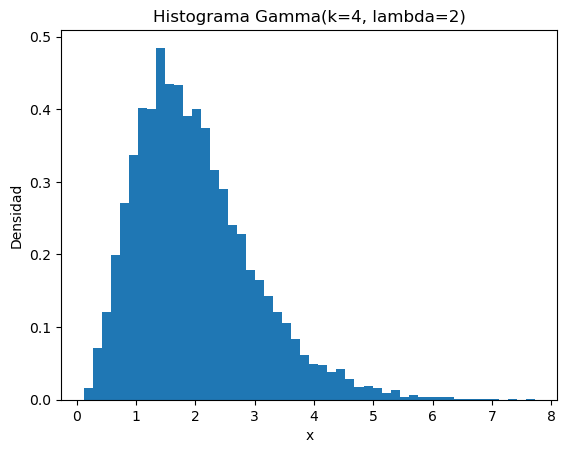

In [106]:
g = Gamma(4, 2)
g.histogram(10000)

## 🎲 Simulación de una Binomial como suma de Bernoulli

La distribución **Binomial** puede construirse de forma natural a partir de variables Bernoulli, lo que permite simularla fácilmente usando únicamente variables Uniforme$(0,1)$.

---

### 📌 Idea básica

Recordemos que si

$$
X \sim \text{Bernoulli}(p),
$$

entonces puede generarse usando una uniforme

$$
U \sim \text{Uniforme}(0,1)
$$

mediante

$$
X = \mathbf{1}\{U \le p\}.
$$

---

### 🔁 Construcción de la Binomial

Sea

$$
X_1, X_2, \dots, X_n \sim \text{Bernoulli}(p) \quad \text{iid}.
$$

Entonces la suma

$$
S_n = X_1 + X_2 + \cdots + X_n
$$

sigue una distribución

$$
S_n \sim \text{Binomial}(n,p).
$$

---

### ⚙️ Algoritmo de simulación

Para generar una realización de $Y \sim \text{Binomial}(n,p)$:

1. Generar $U_1,\dots,U_n \sim \text{Uniforme}(0,1)$.
2. Definir

$$
X_i =
\begin{cases}
1, & U_i \le p, \\
0, & U_i > p.
\end{cases}
$$

3. Calcular

$$
Y = \sum_{i=1}^{n} X_i.
$$

---

### 🧠 Interpretación

La distribución binomial puede verse como el número de éxitos en $n$ ensayos independientes, donde cada ensayo se obtiene transformando una uniforme mediante una función indicadora. Esto muestra nuevamente cómo muchas distribuciones discretas pueden construirse a partir de Uniformes$(0,1)$.


In [109]:
class Binomial:
    """
    Generador Binomial(n, p) como suma de n Bernoulli(p)
    """

    def __init__(self, n, p):
        if n <= 0 or int(n) != n:
            raise ValueError("n debe ser entero positivo")
        if not (0 <= p <= 1):
            raise ValueError("p debe estar en [0,1]")

        self.n = int(n)
        self.p = p
        self.bern = Bernoulli(p)

    # ---------------------------------------------------
    # Genera una sola realización
    # ---------------------------------------------------
    def _next(self):
        total = 0
        for _ in range(self.n):
            total += self.bern._next()
        return total

    # ---------------------------------------------------
    # Genera muestra
    # ---------------------------------------------------
    def sample(self, size):
        return [self._next() for _ in range(size)]

    # ---------------------------------------------------
    # Bar plot (discreta)
    # ---------------------------------------------------
    def barplot(self, size):
        data = self.sample(size)

        valores = list(range(self.n + 1))
        conteos = [data.count(v) / size for v in valores]  # 🔥 frecuencia relativa

        plt.figure()
        plt.bar(valores, conteos)
        plt.title(f"Bar plot Binomial(n={self.n}, p={self.p})")
        plt.xlabel("k")
        plt.ylabel("Probabilidad empírica")
        plt.show()

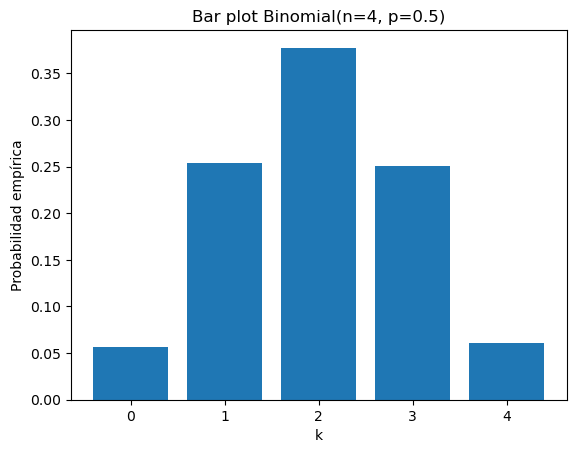

In [112]:
Bin = Binomial(4, 0.5)
Bin.barplot(10000)